In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import pandas
import pandas as pd

# Define file path
file_path = '/content/drive/My Drive/Dataset/KC2.csv'

# Read CSV file into DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df)



Mounted at /content/drive
               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1    

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train_data = df

In [ ]:
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503


In [ ]:
train_data.shape

(21613, 21)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

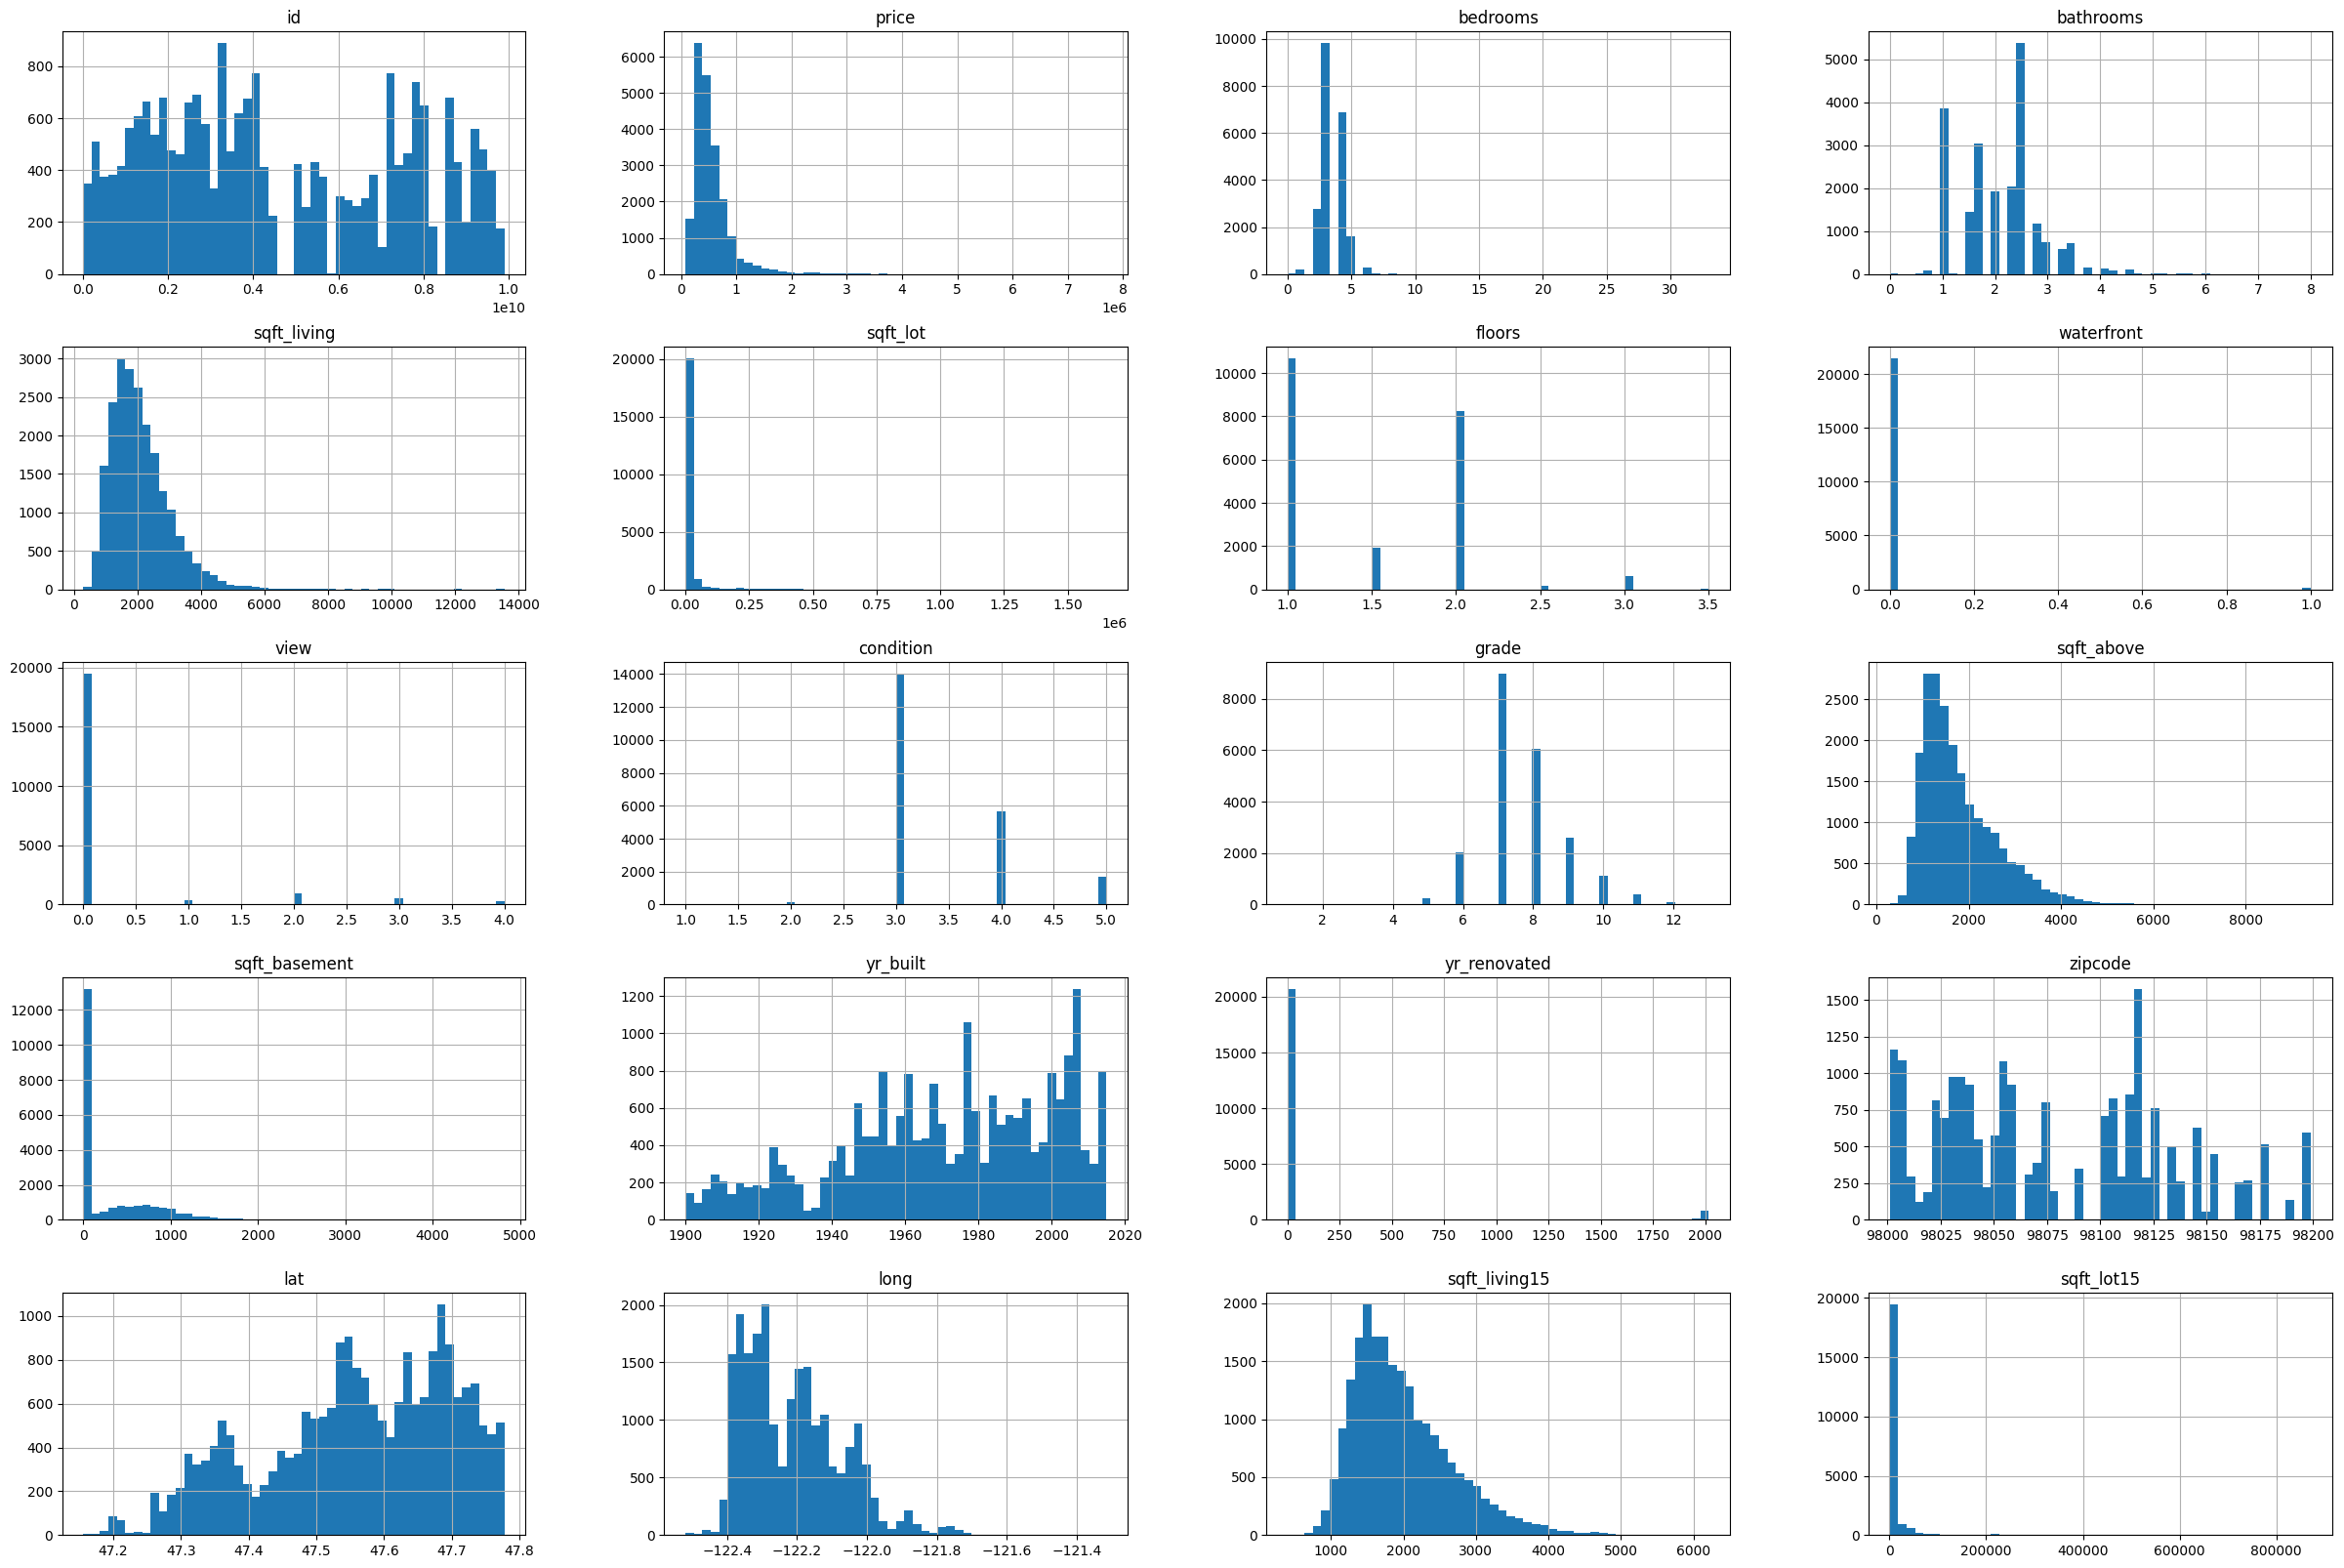

In [ ]:
# Plot the histograms of each
train_data.hist(bins=50, figsize=(30,20))
plt.show()

In [ ]:
#Function to plot histogram of price
def DrawHistogram(variable_name):
    n, bins, patches = plt.hist(x=variable_name, bins=100, color='green', alpha=0.5)
    plt.ylabel('Frequency')
    maxfreq = n.max()

Text(0.5, 0, 'price')

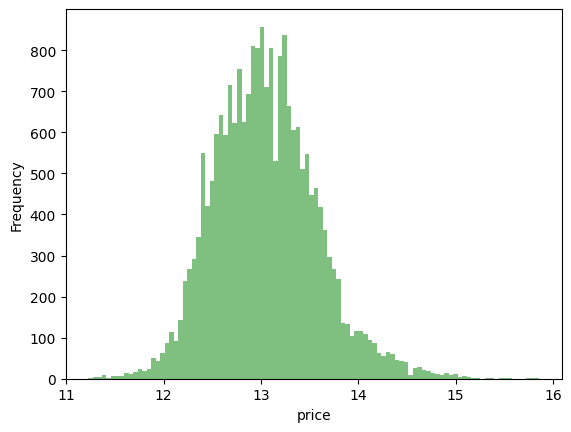

In [ ]:
train_data.price = np.log(train_data.price)
DrawHistogram(train_data.price)
plt.xlabel('price')

In [ ]:
train_data['year_sold'] = train_data['date'].apply(lambda x: int(x[:4]))

In [ ]:
train_data['house_age'] = train_data[['year_sold']].sub(train_data['yr_built'], axis=0)

In [ ]:
train_data['is_renovated'] = train_data['yr_renovated'].apply(lambda x: 0 if x==0 else 1)

In [ ]:
train_data.drop(["yr_built", "yr_renovated","date","year_sold"], axis = 1, inplace = True)

In [ ]:
train_data.shape

(21613, 20)

<Axes: >

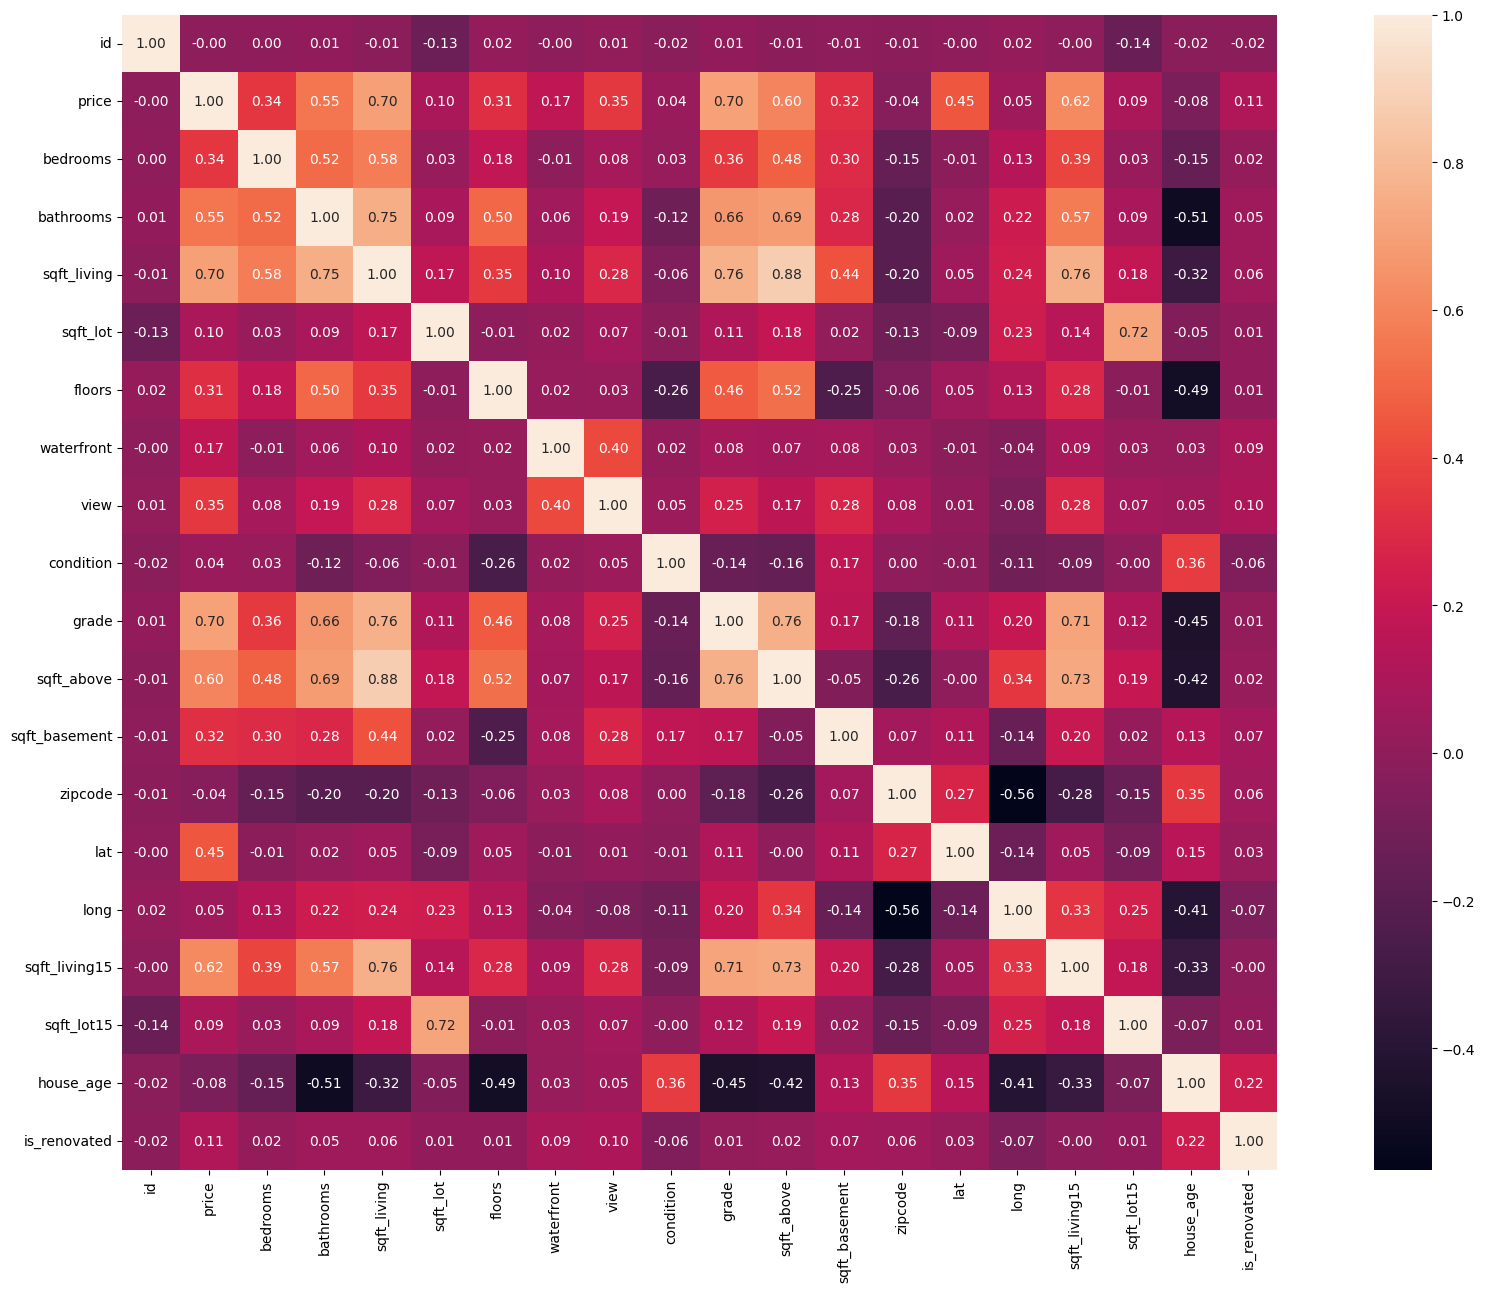

In [ ]:
#price correlation matrix
corrmat =train_data.corr()
fig,ax= plt.subplots()
fig.set_size_inches(25,15)
sns.heatmap(corrmat,square=True,annot=True, fmt='.2f')

In [ ]:
corr_matrix = train_data.corr()
cor_target=abs(corr_matrix["price"]).sort_values(ascending=False)
cor_target

price           1.000
grade           0.704
sqft_living     0.695
sqft_living15   0.619
sqft_above      0.602
bathrooms       0.551
lat             0.449
view            0.347
bedrooms        0.344
sqft_basement   0.317
floors          0.311
waterfront      0.175
is_renovated    0.114
sqft_lot        0.100
sqft_lot15      0.092
house_age       0.081
long            0.050
condition       0.040
zipcode         0.038
id              0.004
Name: price, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


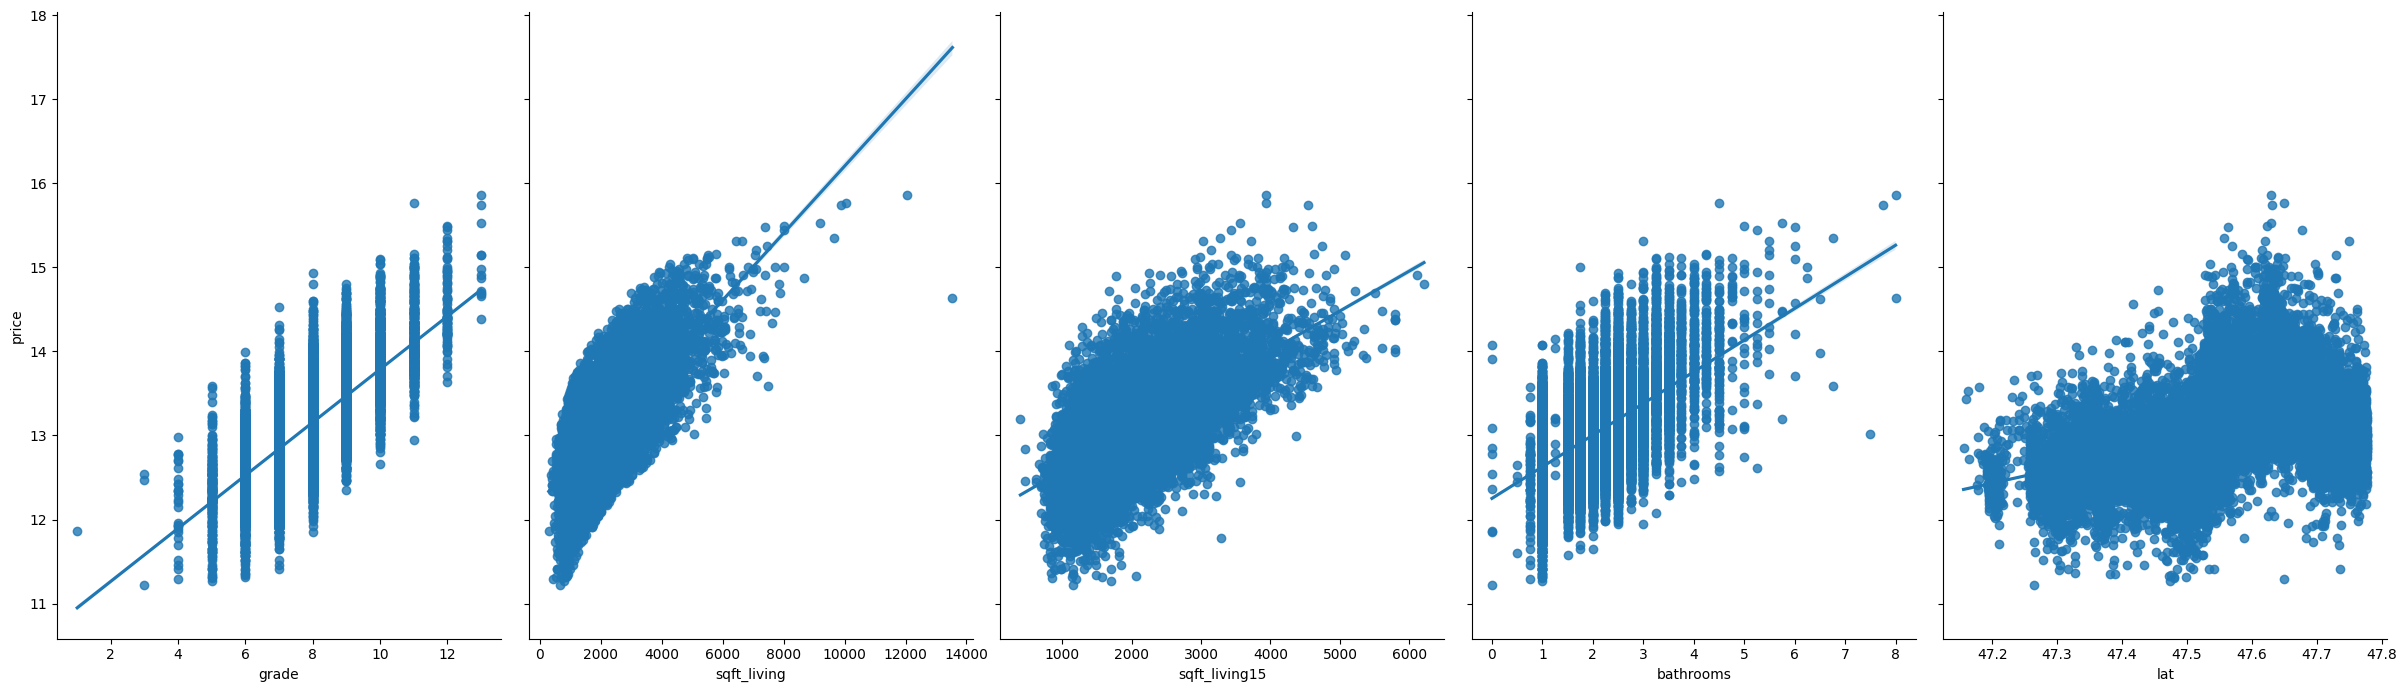

In [ ]:
sns.pairplot(train_data, x_vars=['grade','sqft_living','sqft_living15','bathrooms','lat'], y_vars='price', size=7, aspect=0.7, kind='reg')


In [ ]:
import plotly.express as px
import pandas as pd

# Assuming train_data is a pandas DataFrame
main_features = ['grade', 'sqft_living', 'sqft_living15', 'bathrooms', 'lat', 'price']

# Normalize the data if needed
train_data_normalized = (train_data[main_features] - train_data[main_features].min()) / (train_data[main_features].max() - train_data[main_features].min())

# Create parallel coordinates plot with adjusted color scale
fig = px.parallel_coordinates(train_data_normalized,
                              dimensions=main_features,
                              color='price',
                              labels={'price': 'Price'},
                              color_continuous_scale=px.colors.sequential.Viridis,  # Adjust the color scale
                              color_continuous_midpoint=0)

fig.show()




/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



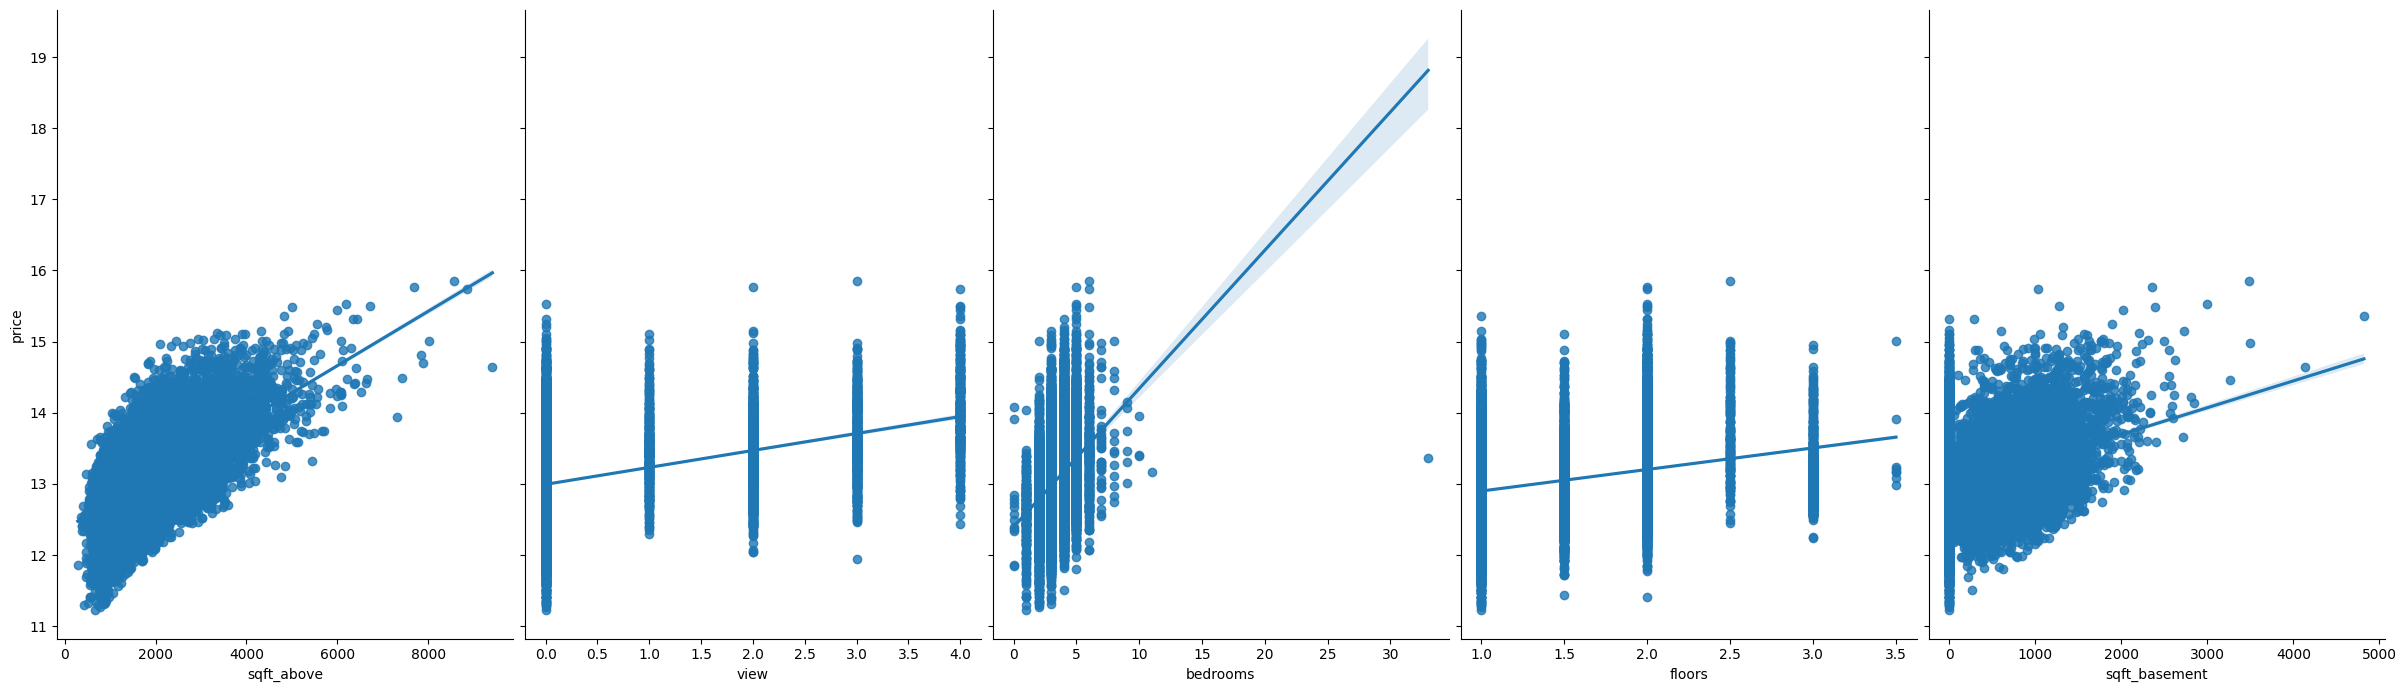

In [ ]:
sns.pairplot(train_data, x_vars=['sqft_above','view','bedrooms','floors','sqft_basement'], y_vars='price', size=7, aspect=0.7, kind='reg')
